# Comparación de espectros en número de onda

En este notebook se hace una comparación de los espectros $E(k_x, k_y)$ obtenidos con las observaciones de los alamabres de capacitancia y el sensor de movimiento de la BOMM1-PER desde julio de 2018 hasta febrero de 2018.

In [1]:
# import libs
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pickle
import os
#
# import local libs
import src.processing.wdm as wdm 
from src.processing.wdm.spectra import polar_spectrum
from src.processing.processing_data import ProcessingData
#
%matplotlib inline

In [35]:
def process_data(date):
    """Process data for an specific date"""
    
    metafile = f"../metadata/bomm1_per1.yml" 
    filename = f".{date.strftime('%Y%m%d%H%M%S')}.pkl"
    
    if os.path.exists(filename):
        with open(filename, "br") as ff:
            p = pickle.load(ff)
    else:
        p = ProcessingData(metafile)
        p.run(date)
        with open(filename, "bw") as ff:
            pickle.dump(p, ff)
            
    return p

In [36]:
def plot_kxky_spectrum(kxbin, kybin, E):
    """Function to plot a kx-ky-spectrum"""
    
    # create custom colormap
    colors = ["#FFFFFF", "#01DFA5", "#FE642E", "#08298A", "#01A9DB"]
    cmap = mcolors.LinearSegmentedColormap.from_list('cmap', colors, N=1024)

    # create figure
    fig, ax = plt.subplots(1, figsize=(5,4), dpi=150)
    pc = ax.pcolormesh(kxbin, kybin, E, cmap=cmap)
    cr = plt.contour(kxbin, kybin, E, colors="k")
    cb = fig.colorbar(pc)
    
    ax.set_xlabel("$k_x\,\mathrm{[rad/m]}$")
    ax.set_ylabel("$k_y\,\mathrm{[rad/m]}$")
    
    ax.set_aspect("equal")
    ax.axvline(0, color="k")
    ax.axhline(0, color="k")
    ax.set_xlim((-0.3,0.3))
    ax.set_ylim((-0.3,0.3))
    for ltick in [200,100,50,25]:
        ktick = 2*np.pi/ltick
        circle = plt.Circle((0,0), ktick, color="0.5", linestyle="dashed", fill=False)
        ax.add_artist(circle)
        ax.text(ktick*np.cos(0.78), ktick*np.sin(0.78), f"{ltick} m", fontsize=7)
    
    return fig, ax

In [38]:
# terrasar-x
dates_tsx = [
        '20180713T122722', '20180714T003126', '20180720T000255',
        '20180822T002322', '20180917T122725', '20180928T122726',
        '20181016T002302', '20181020T122727', '20181021T003133',
        '20181112T003131', '20181118T002259'
        ]


# sentinel
dates_snt = [
        '20180712T003311', '20180805T003313', '20180807T122429',
        '20180817T003314', '20180819T122429', '20180831T122430',
        '20180910T003315', '20180912T122430', '20181023T002513',
        '20181109T003315', '20181111T122431', '20181203T003315',
        '20181205T122430'
        ]

2018-08-22 00:30:00: Exception ocurred in function self.current_data() at line 666 ---> Error: Number of nans is more than 30%.
2018-09-17 12:30:00: Exception ocurred in function self.current_data() at line 666 ---> Error: Number of nans is more than 30%.
2018-09-28 12:30:00: Exception ocurred in function self.current_data() at line 666 ---> Error: Number of nans is more than 30%.
2018-10-16 00:30:00: Exception ocurred in function self.current_data() at line 666 ---> Error: Number of nans is more than 30%.
2018-10-20 12:30:00: Exception ocurred in function self.current_data() at line 666 ---> Error: Number of nans is more than 30%.
2018-10-21 00:30:00: Exception ocurred in function self.current_data() at line 666 ---> Error: Number of nans is more than 30%.
2018-11-12 00:30:00: Exception ocurred in function self.current_data() at line 666 ---> Error: Number of nans is more than 30%.
2018-11-18 00:30:00: Exception ocurred in function self.current_data() at line 666 ---> Error: Number of

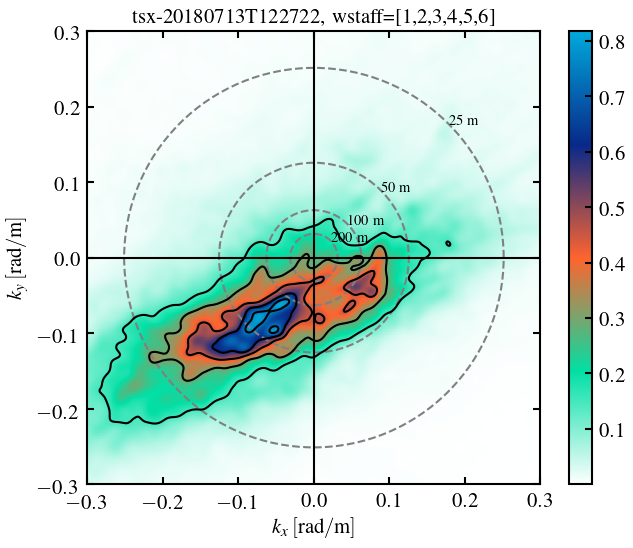

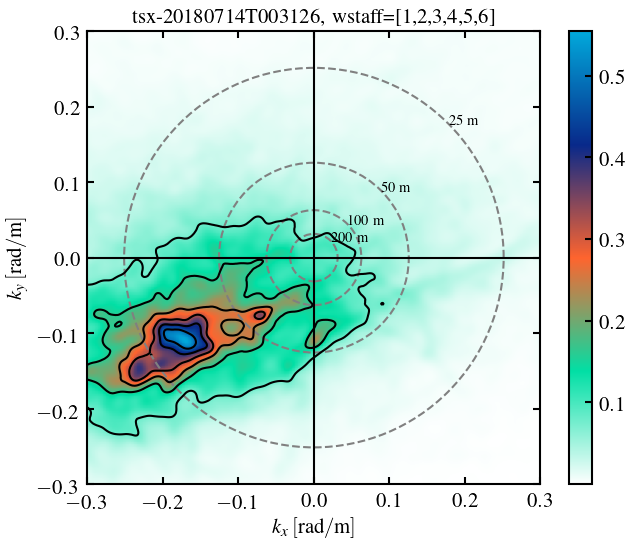

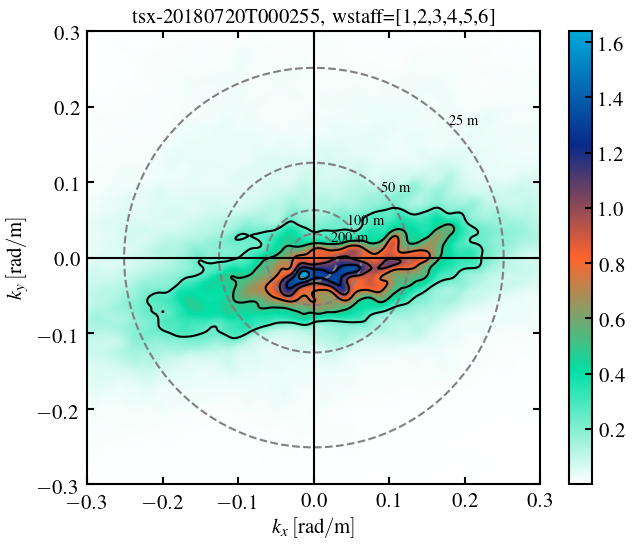

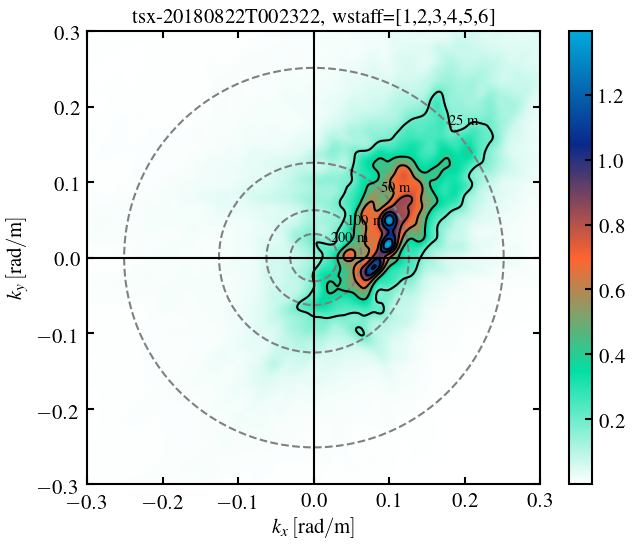

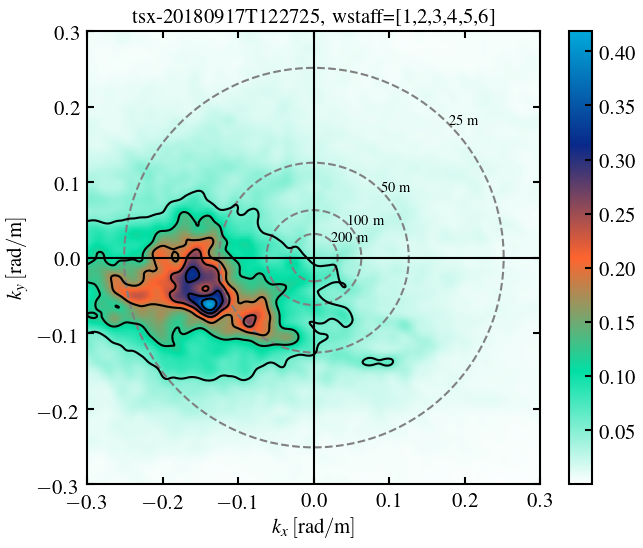

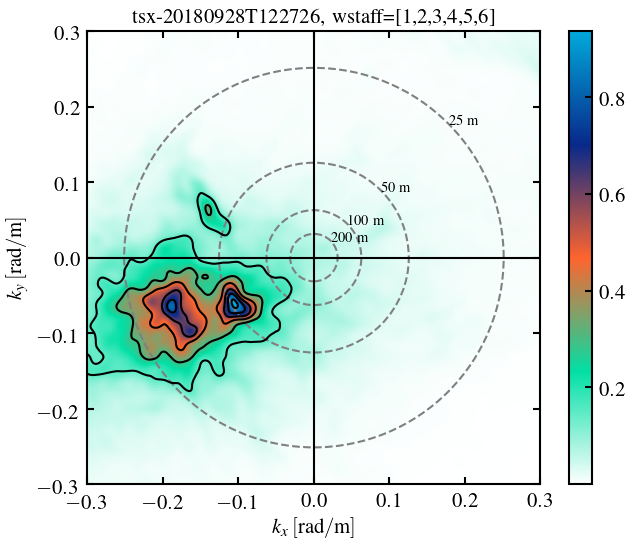

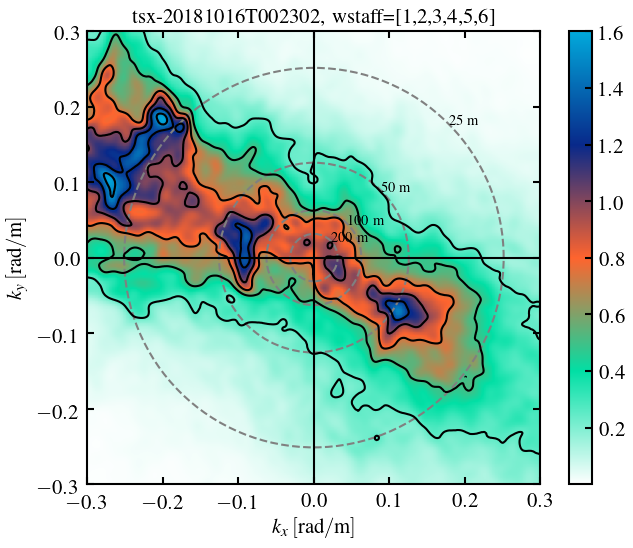

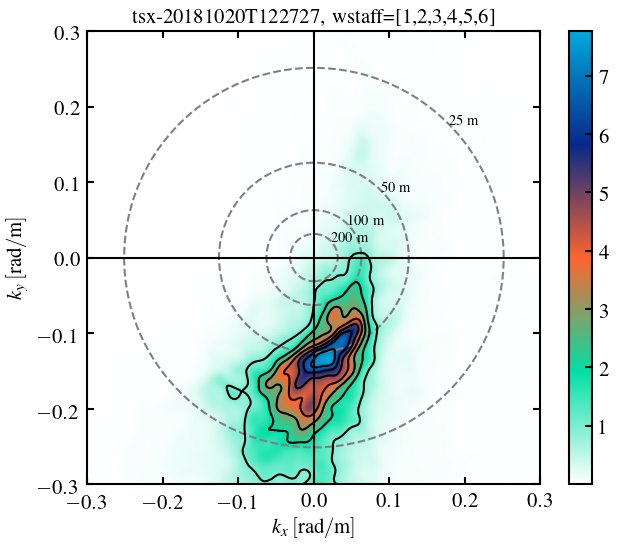

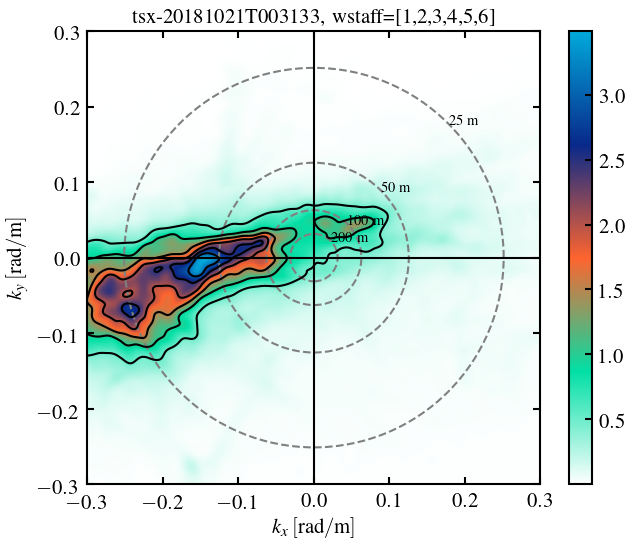

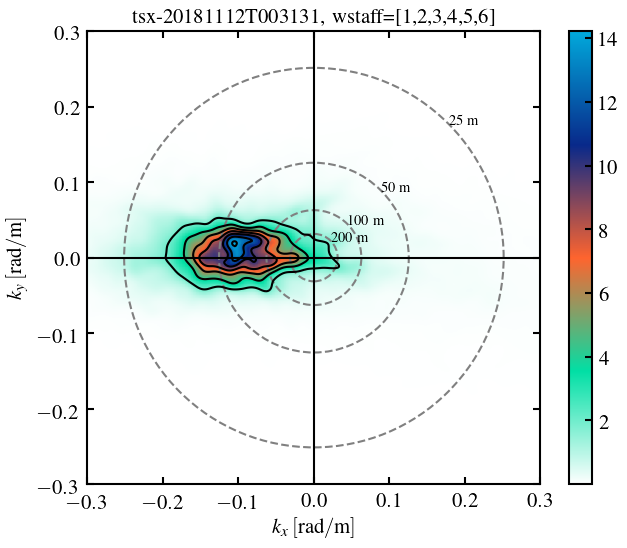

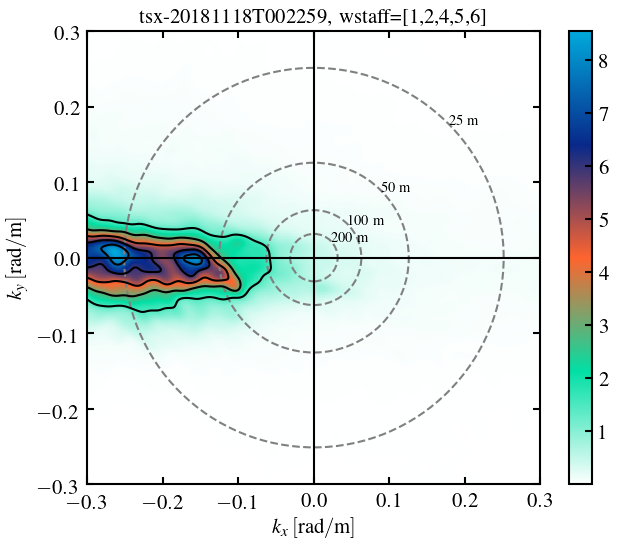

In [39]:
# terrasar-x data
for strdate in dates_tsx:
    
    # load data
    date = dt.datetime.strptime(strdate, "%Y%m%dT%H%M%S")
    date = date.replace(minute=30*round(date.minute/30), second=0)
    p = process_data(date)

    # plot kxky-spectrum
    ix = p.valid_wires_index
    kxbin, kybin, E = wdm.wave_spectrum("kxky", p.Z[:,ix], p.X[:,ix], p.Y[:,ix],
                                        fs=20, ws=(30,30), kxmax=0.3, nwnum=1024)
    fig, ax = plot_kxky_spectrum(kxbin, kybin, E)
    ax.set_title(f"tsx-{strdate}, wstaff=[{','.join(str(i) for i in p.valid_wires)}]")
    #fig.savefig(f"tsx_{strdate}.png", dpi=150)

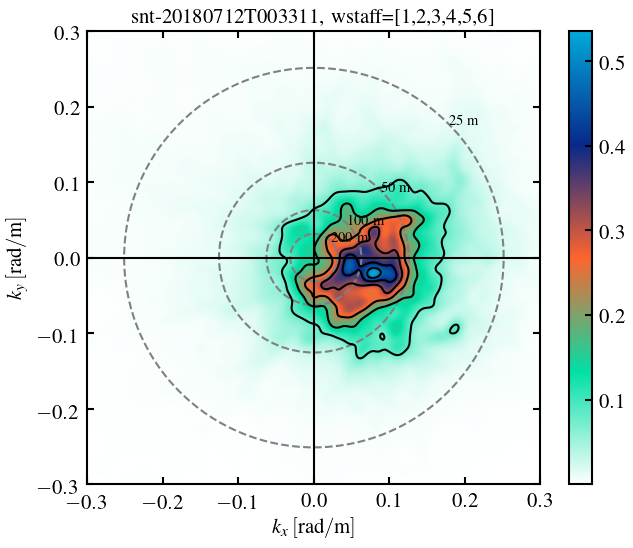

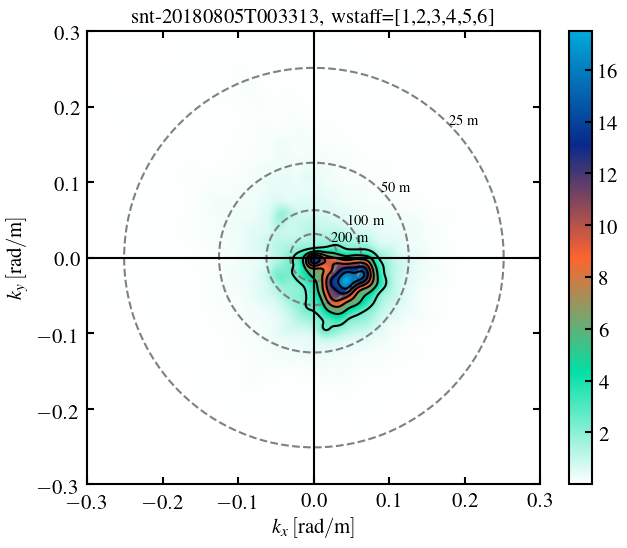

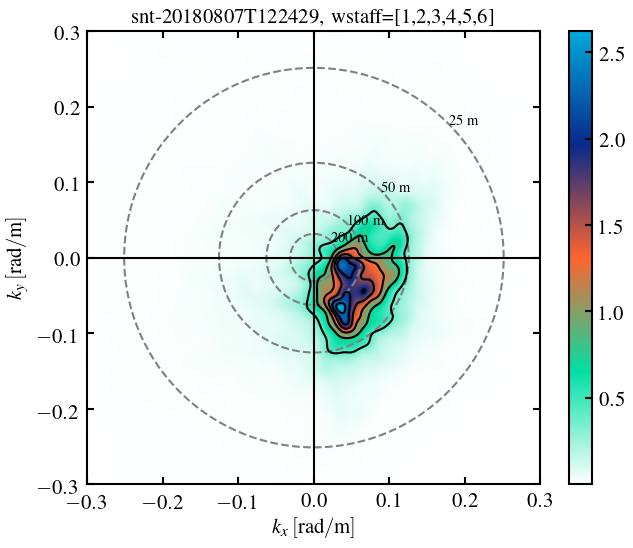

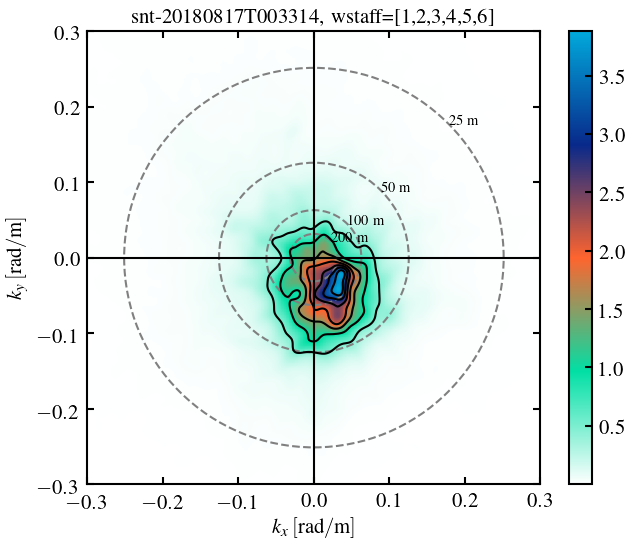

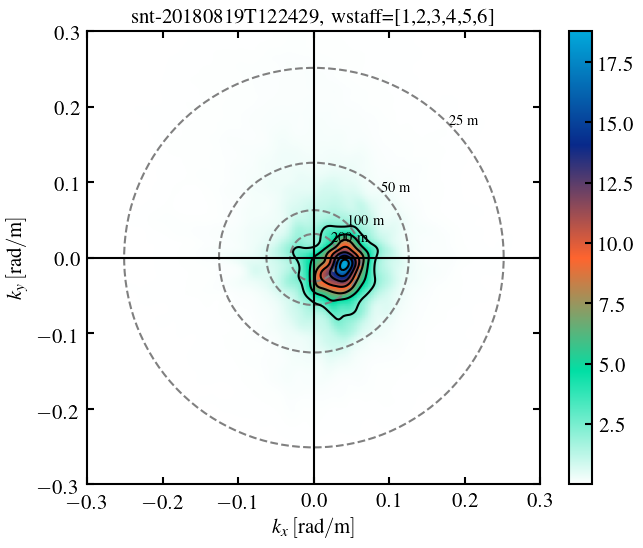

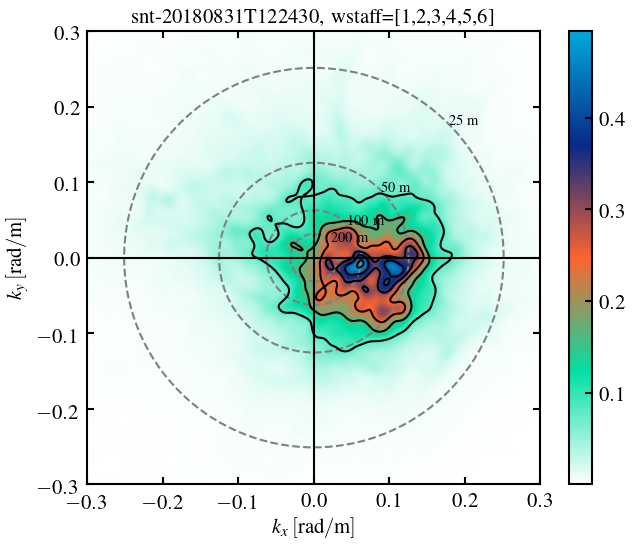

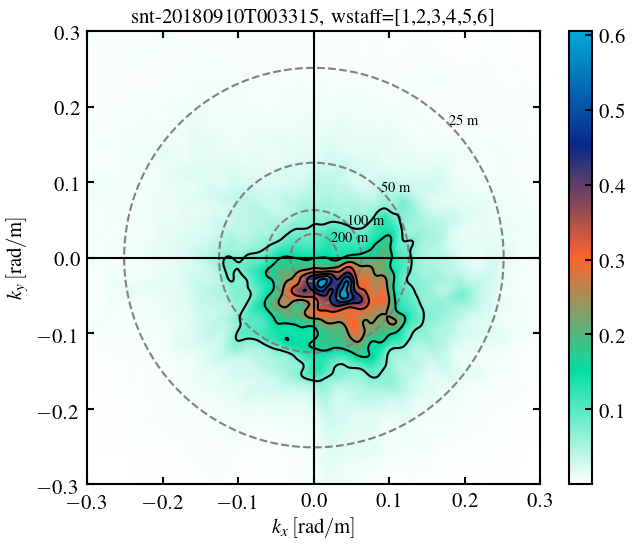

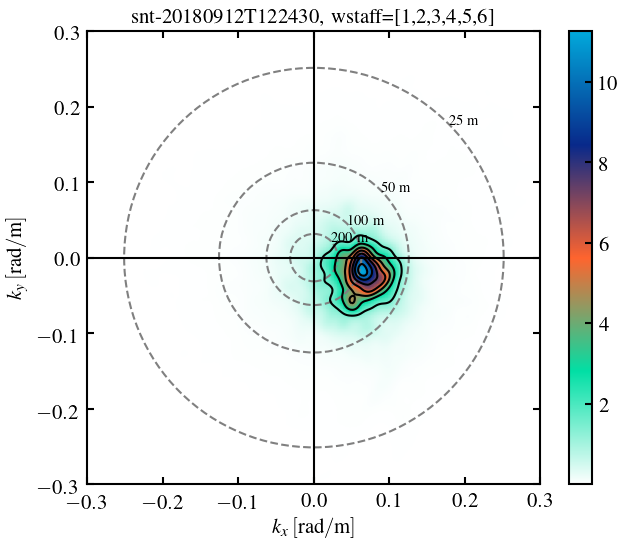

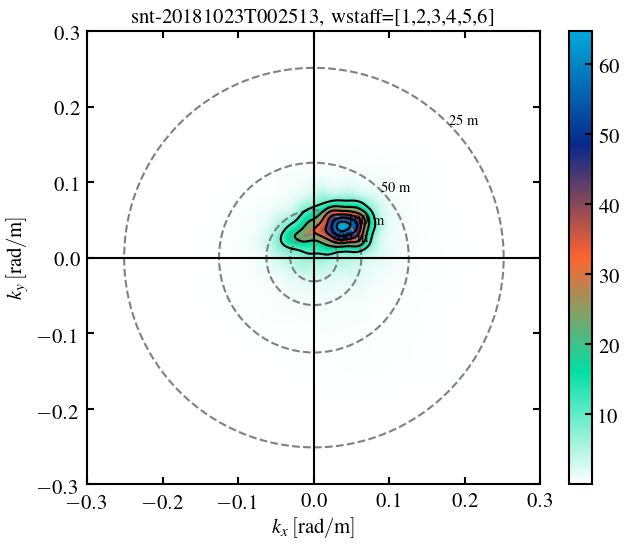

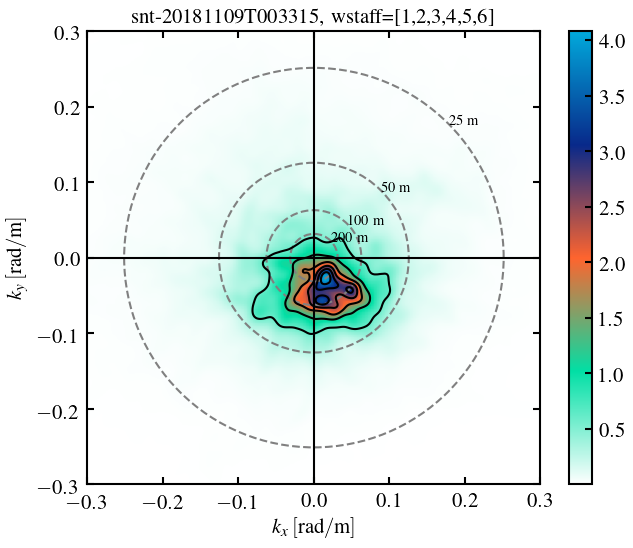

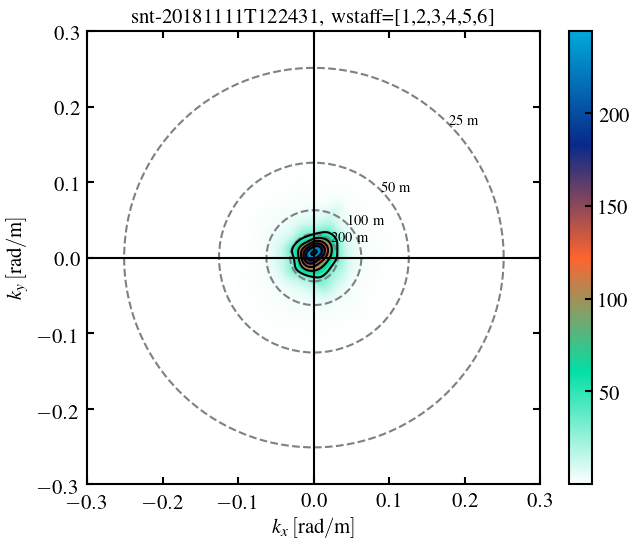

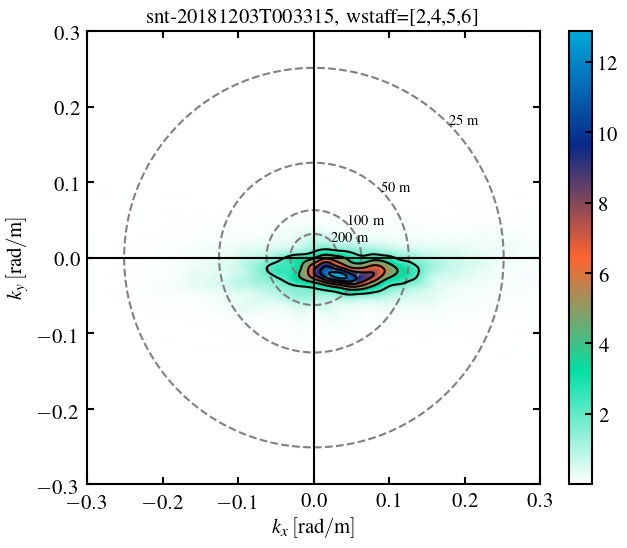

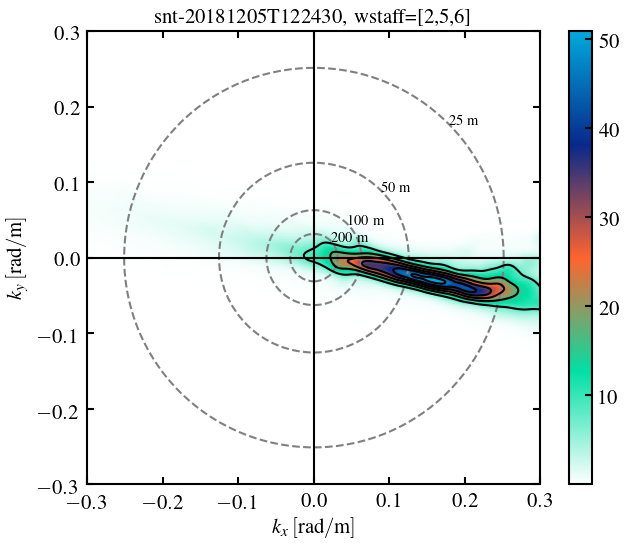

In [33]:
# sentinel data
for strdate in dates_snt:
    
    # load data
    date = dt.datetime.strptime(strdate, "%Y%m%dT%H%M%S")
    date = date.replace(minute=30*round(date.minute/30), second=0)
    p = process_data(date)

    # plot kxky-spectrum
    ix = p.valid_wires_index
    kxbin, kybin, E = wdm.wave_spectrum("kxky", p.Z[:,ix], p.X[:,ix], p.Y[:,ix],
                                        fs=20, ws=(30,30), kxmax=0.3, nwnum=1024)
    fig, ax = plot_kxky_spectrum(kxbin, kybin, E)
    ax.set_title(f"snt-{strdate}, wstaff=[{','.join(str(i) for i in p.valid_wires)}]")
    #fig.savefig(f"snt_{strdate}.png", dpi=150)